# Structure of Notebook

1. Problem Statement
2. Loading Libraries and Data
3. Data Preprocessing(Outliers & Missing values)
4. Feature extraction and exploration
5. Training and Validation data
6. Time Series Forecasting models
7. Machine Learning models

## Auto Claim Prediction

Nothing ruins the thrill of buying a brand new car more quickly than seeing your new insurance bill. This is even more painful when you know you’re a good driver. It doesn’t seem fair that you have to pay so much if you’ve been cautious on the road for years.

In this competition, you’re challenged to build a model that predicts the if a driver will initiate an auto insurance claim in the next year. A more accurate prediction will allow them to further tailor their prices, and hopefully make auto insurance coverage more accessible to more drivers.

# 2. Loading the Libraries and the Data

In [1]:
#importing required libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import matplotlib
from sklearn.metrics import mean_squared_log_error
from math import sqrt
from statistics import mean, stdev
from sklearn.model_selection import  train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("Train_final.csv")
test=pd.read_csv('test_final.csv')
sample=pd.read_csv('sample_submission.csv')

### 3. EDA

In [3]:
train.head()

,id,target,X1,X2,X3,X4,X5,X6,X7,X8,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,1,0,5,1,3,1,0,0,1,0,...,7,1,2,10,0,0,1,0,1,0
1,2,0,3,1,3,1,0,0,1,0,...,7,2,2,3,0,1,0,1,0,0
2,3,0,4,1,7,0,0,1,0,0,...,11,1,3,10,0,1,1,1,0,0
3,4,0,5,2,5,1,0,0,0,1,...,6,3,2,8,1,1,0,0,1,0
4,5,0,1,1,4,0,0,0,1,0,...,4,1,1,5,0,1,1,0,0,0


In [4]:
test.head()

,id,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,148105,4,1,8,1,0,1,0,0,0,...,1,3,5,5,0,1,0,0,0,0
1,148106,0,2,1,0,2,0,1,0,0,...,4,1,2,9,0,1,1,0,1,0
2,148107,1,1,8,0,0,0,0,0,1,...,5,2,4,8,0,0,1,0,0,0
3,148108,5,1,5,0,0,0,0,0,1,...,8,3,1,3,0,1,1,1,1,0
4,148109,2,3,3,1,0,1,0,0,0,...,4,0,2,6,0,1,0,0,0,0


In [5]:
sample.head()

,id,target
0,148105,0
1,148106,0
2,148107,0
3,148108,0
4,148109,0


In [6]:
train.sum().isnull()

id        False
target    False
X1        False
X2        False
X3        False
X4        False
X5        False
X6        False
X7        False
X8        False
X9        False
X10       False
X11       False
X12       False
X13       False
X14       False
X15       False
X16       False
X17       False
X18       False
X19       False
X20       False
X21       False
X22       False
X23       False
X24       False
X25       False
X26       False
X27       False
X28       False
X29       False
X30       False
X31       False
X32       False
X33       False
X34       False
X35       False
X36       False
X37       False
X38       False
X39       False
X40       False
X41       False
X42       False
X43       False
X44       False
X45       False
X46       False
X47       False
X48       False
X49       False
X50       False
X51       False
X52       False
X53       False
X54       False
X55       False
X56       False
X57       False
dtype: bool

In [7]:
test.sum().isnull()

id     False
X1     False
X2     False
X3     False
X4     False
X5     False
X6     False
X7     False
X8     False
X9     False
X10    False
X11    False
X12    False
X13    False
X14    False
X15    False
X16    False
X17    False
X18    False
X19    False
X20    False
X21    False
X22    False
X23    False
X24    False
X25    False
X26    False
X27    False
X28    False
X29    False
X30    False
X31    False
X32    False
X33    False
X34    False
X35    False
X36    False
X37    False
X38    False
X39    False
X40    False
X41    False
X42    False
X43    False
X44    False
X45    False
X46    False
X47    False
X48    False
X49    False
X50    False
X51    False
X52    False
X53    False
X54    False
X55    False
X56    False
X57    False
dtype: bool

* No missing values are found in both train and test datasets 

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148104 entries, 0 to 148103
Data columns (total 59 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      148104 non-null  int64  
 1   target  148104 non-null  int64  
 2   X1      148104 non-null  int64  
 3   X2      148104 non-null  int64  
 4   X3      148104 non-null  int64  
 5   X4      148104 non-null  int64  
 6   X5      148104 non-null  int64  
 7   X6      148104 non-null  int64  
 8   X7      148104 non-null  int64  
 9   X8      148104 non-null  int64  
 10  X9      148104 non-null  int64  
 11  X10     148104 non-null  int64  
 12  X11     148104 non-null  int64  
 13  X12     148104 non-null  int64  
 14  X13     148104 non-null  int64  
 15  X14     148104 non-null  int64  
 16  X15     148104 non-null  int64  
 17  X16     148104 non-null  int64  
 18  X17     148104 non-null  int64  
 19  X18     148104 non-null  int64  
 20  X19     148104 non-null  float64
 21  X20     14

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63474 entries, 0 to 63473
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      63474 non-null  int64  
 1   X1      63474 non-null  int64  
 2   X2      63474 non-null  int64  
 3   X3      63474 non-null  int64  
 4   X4      63474 non-null  int64  
 5   X5      63474 non-null  int64  
 6   X6      63474 non-null  int64  
 7   X7      63474 non-null  int64  
 8   X8      63474 non-null  int64  
 9   X9      63474 non-null  int64  
 10  X10     63474 non-null  int64  
 11  X11     63474 non-null  int64  
 12  X12     63474 non-null  int64  
 13  X13     63474 non-null  int64  
 14  X14     63474 non-null  int64  
 15  X15     63474 non-null  int64  
 16  X16     63474 non-null  int64  
 17  X17     63474 non-null  int64  
 18  X18     63474 non-null  int64  
 19  X19     63474 non-null  float64
 20  X20     63474 non-null  float64
 21  X21     63474 non-null  float64
 22

In [10]:
train.describe(include='all')

,id,target,X1,X2,X3,X4,X5,X6,X7,X8,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
count,148104.000000,148104.000000,148104.000000,148104.000000,148104.000000,148104.000000,148104.000000,148104.000000,148104.000000,148104.000000,...,148104.000000,148104.000000,148104.000000,148104.000000,148104.000000,148104.000000,148104.000000,148104.000000,148104.000000,148104.000000
mean,74052.500000,0.025705,1.899523,1.360719,4.429556,0.401549,0.451791,0.399192,0.265199,0.164567,...,5.438996,1.439853,2.873177,7.535408,0.122252,0.627242,0.553314,0.286319,0.350564,0.152406
std,42754.086471,0.158254,1.982132,0.667676,2.705631,0.510720,1.420235,0.489734,0.441440,0.370790,...,2.336564,1.201636,1.694054,2.740629,0.327578,0.483540,0.497151,0.452042,0.477148,0.359416
min,1.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37026.750000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,74052.500000,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,111078.250000,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,148104.000000,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,9.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
train.dtypes

id          int64
target      int64
X1          int64
X2          int64
X3          int64
X4          int64
X5          int64
X6          int64
X7          int64
X8          int64
X9          int64
X10         int64
X11         int64
X12         int64
X13         int64
X14         int64
X15         int64
X16         int64
X17         int64
X18         int64
X19       float64
X20       float64
X21       float64
X22         int64
X23         int64
X24         int64
X25         int64
X26         int64
X27         int64
X28         int64
X29         int64
X30         int64
X31         int64
X32         int64
X33         int64
X34       float64
X35       float64
X36       float64
X37       float64
X38       float64
X39       float64
X40       float64
X41         int64
X42         int64
X43         int64
X44         int64
X45         int64
X46         int64
X47         int64
X48         int64
X49         int64
X50         int64
X51         int64
X52         int64
X53         int64
X54       

In [12]:
train.shape, test.shape

((148104, 59), (63474, 58))

In [13]:
train['target'].value_counts(normalize =True)

0    0.974295
1    0.025705
Name: target, dtype: float64

The data is imablanced: We wull try three ways to counter the effect the imbalance
* First way: Use smote method
* Second Way: Use the proper classifcation metric (F1 score) and choose the proper threshold

The application of the wrong evaluation matrix on the imbalanced dataset may give us misleading results. Let us take the example of credit card fraud detection. There will be much less data points for “fraud” class (suppose 1%). So, if we take “accuracy” to measure the performance of the model and our model predicts all the observations as “not fraud” then it will give us a 99% accuracy score. Furhtermore, imbalanced dataset will cause the following issues:
Overfitting: Our classification models will assume that in most cases there are no frauds! What we want for our model is to be certain when a fraud occurs.
Wrong Correlations: Although we don't know what the "V" features stand for, it will be useful to understand how each of this features influence the result by having an imbalance dataframe we are not able to see the true correlations between the class and features.

### What can be used instead:

* Confusion Matrix: It tells us about the false positive, false negative, true positive and true negative. It can be used to understand the number of correct and incorrect predictions.

* Precision: The number of true positives divided by total positives; it is also known as Specificity. It tells us how many chosen instances by the model are relevant (fraud in our example).

* Recall: It can be calculated by dividing the total number of true positives with the sum of true positives and false negatives. It is also known as Sensitivity. It tells us how many relevant instances are chosen by the model.

* F1-Score: Harmonic mean of precision and recall.

* AUC-ROC: It gives us the relation between the true positive rate and false positive rate.

In [14]:
#Identification of categorical features 
target = train['target']

id_feats = ['id']
cat_feat=[]
num_feat=[]
for col in train.columns: 
    print(col)
    print(train[col].nunique()) 
    if train[col].nunique()< 100:
        cat_feat.append(col)
    else :
        num_feat.append(col)

id
148104
target
2
X1
8
X2
5
X3
12
X4
3
X5
8
X6
2
X7
2
X8
2
X9
2
X10
2
X11
2
X12
2
X13
2
X14
4
X15
14
X16
2
X17
2
X18
2
X19
10
X20
19
X21
4742
X22
13
X23
3
X24
3
X25
10
X26
3
X27
18
X28
3
X29
2
X30
6
X31
3
X32
104
X33
4
X34
152
X35
38276
X36
768
X37
15
X38
10
X39
10
X40
10
X41
6
X42
7
X43
10
X44
10
X45
11
X46
8
X47
24
X48
20
X49
10
X50
14
X51
23
X52
2
X53
2
X54
2
X55
2
X56
2
X57
2


In [15]:
cat_feat=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X33', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X49', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57']

In [16]:
num_feat=['X19', 'X20','X21', 'X32', 'X34', 'X35', 'X36', 'X37','X39','X47','X48','X50','X51' ]

In [17]:
print('Numerical features are :', num_feat)
print('Categorical features are :', cat_feat)

Numerical features are : ['X19', 'X20', 'X21', 'X32', 'X34', 'X35', 'X36', 'X37', 'X39', 'X47', 'X48', 'X50', 'X51']
Categorical features are : ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X33', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X49', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57']


### Univariate Analysis

In [18]:
# Custom function for easy visualisation of Categorical Variables
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (10*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index ,orient='h', order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

In [19]:
#for fet in cat_feat:
#    train[fet] = train[fet].astype('category')

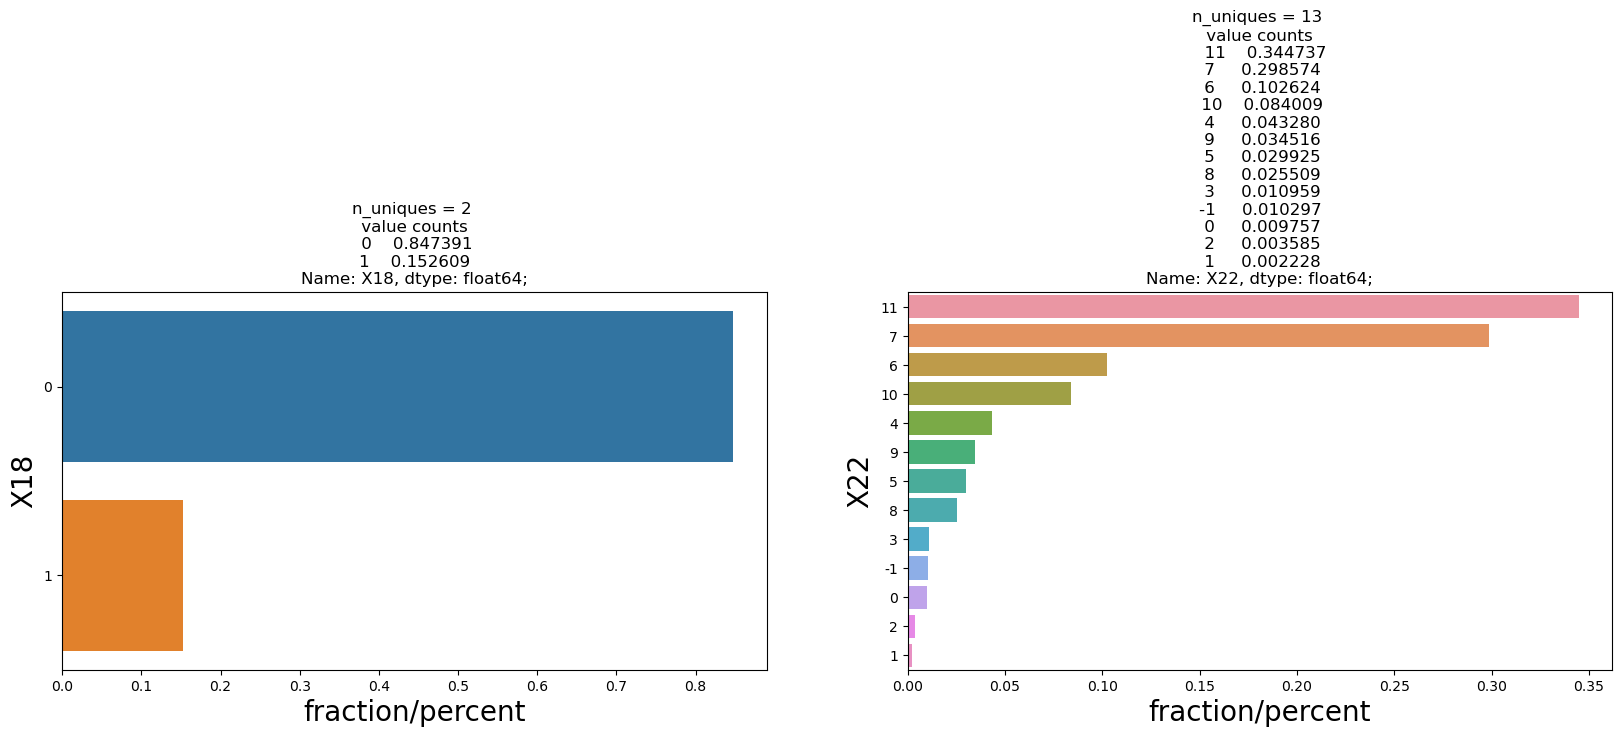

In [20]:
UVA_category(train, cat_feat[17:19])

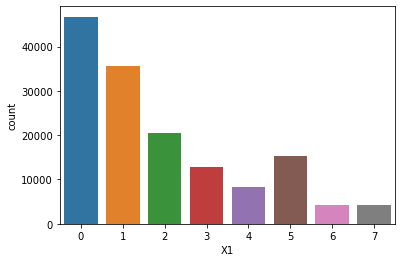

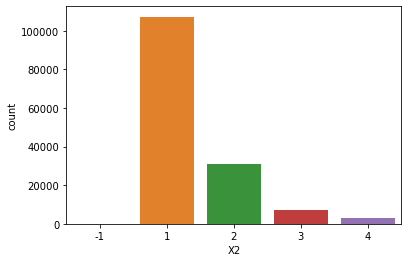

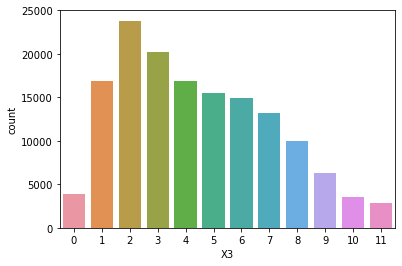

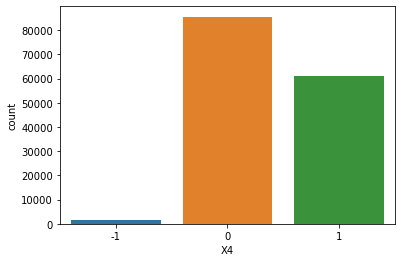

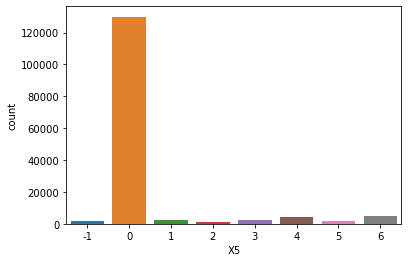

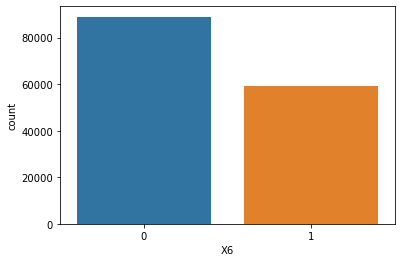

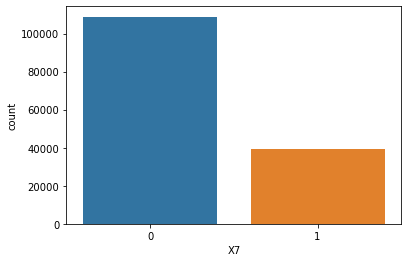

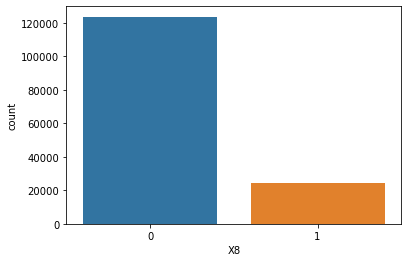

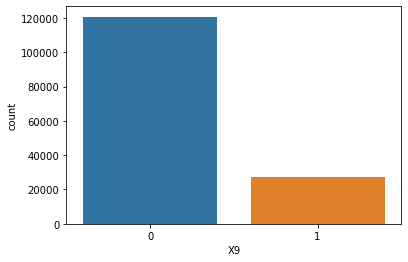

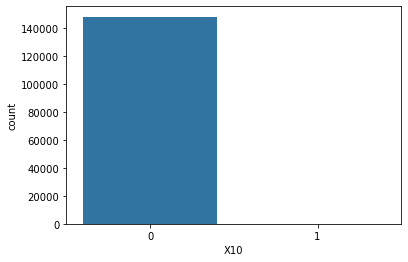

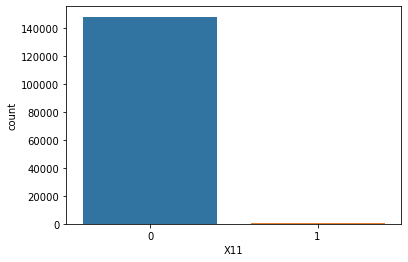

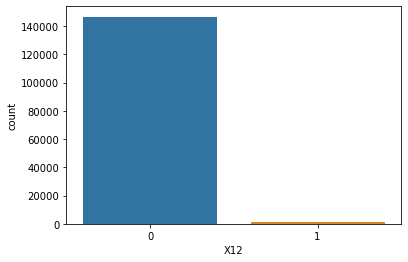

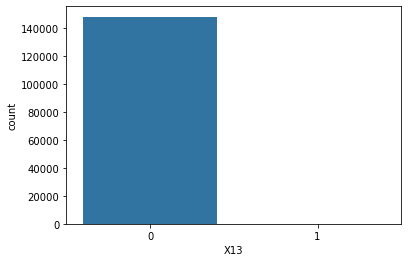

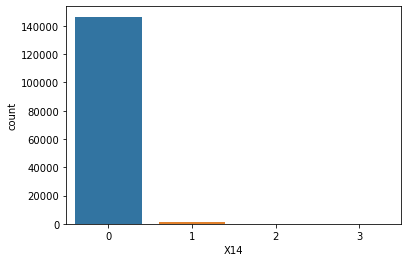

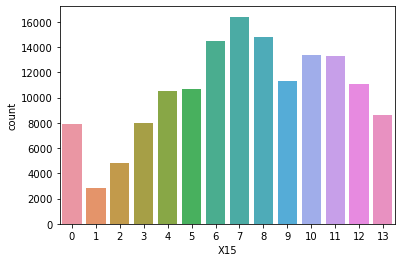

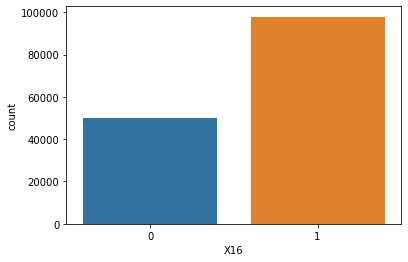

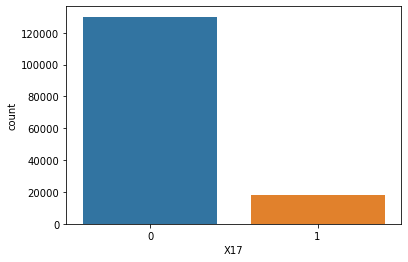

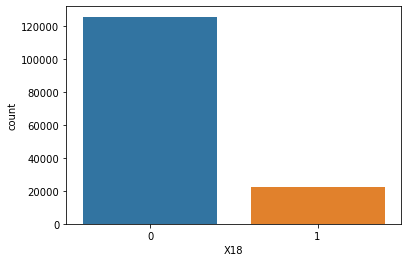

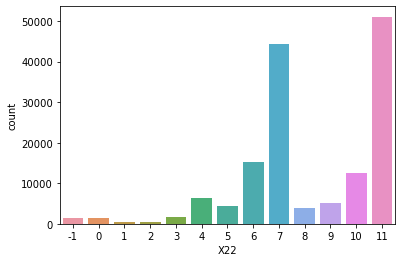

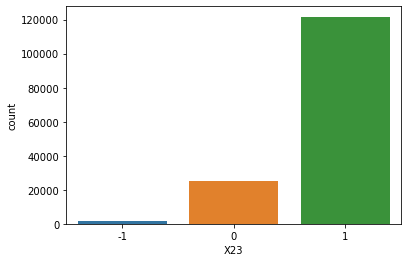

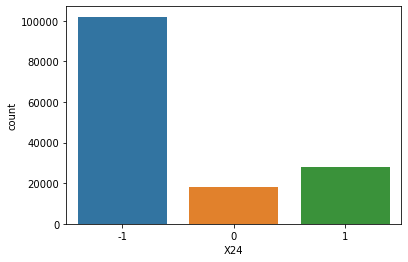

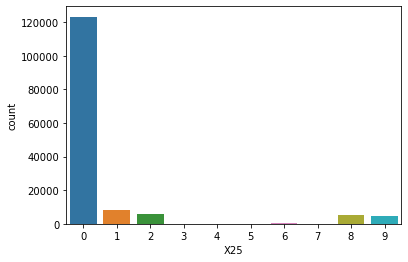

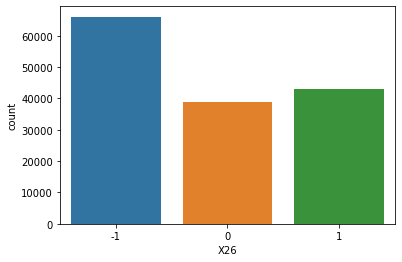

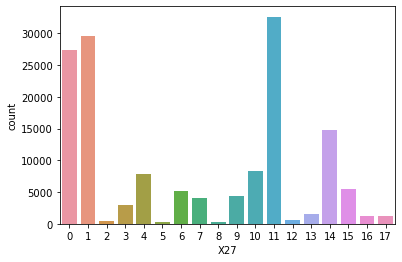

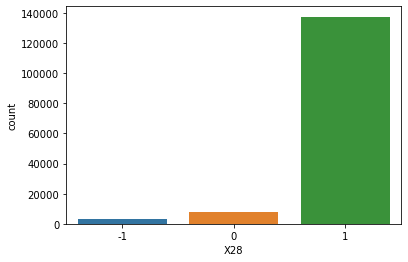

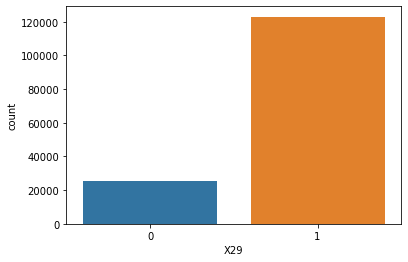

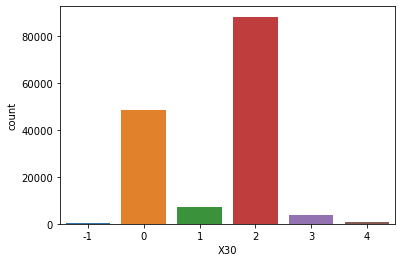

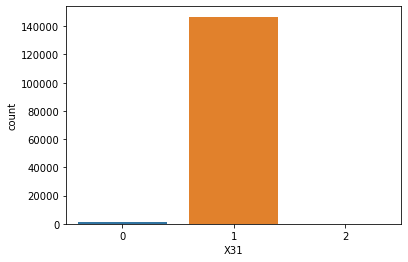

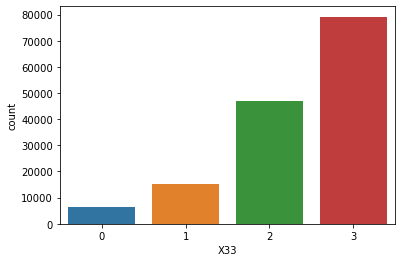

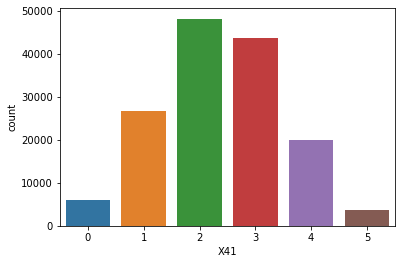

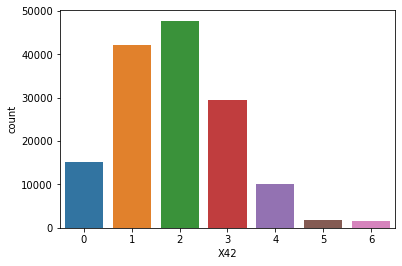

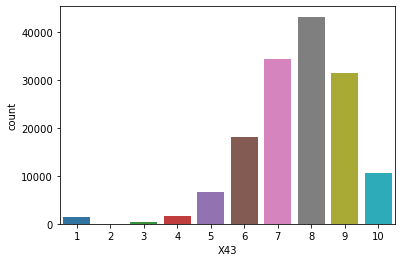

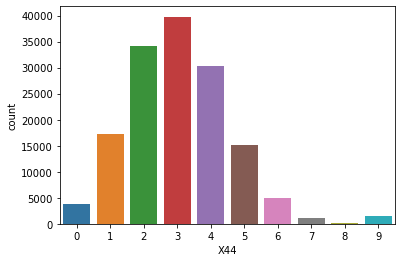

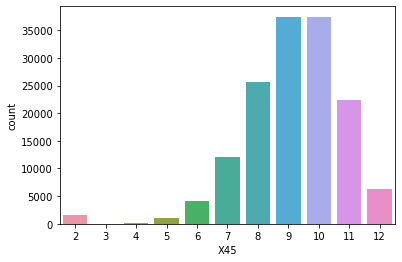

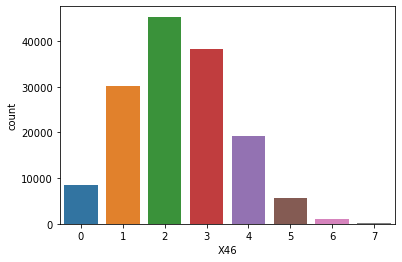

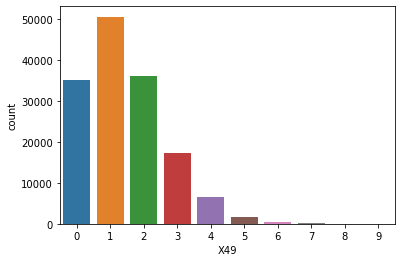

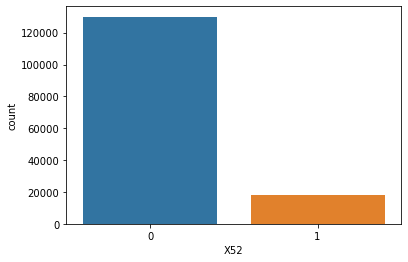

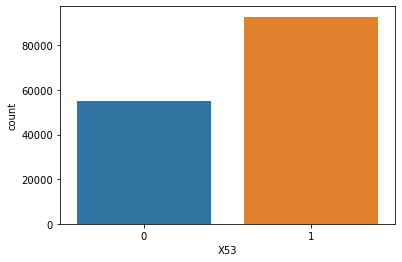

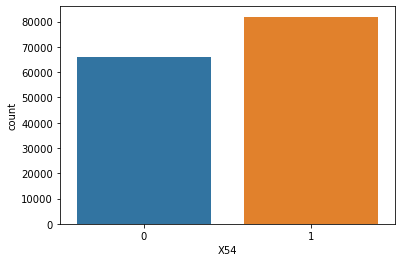

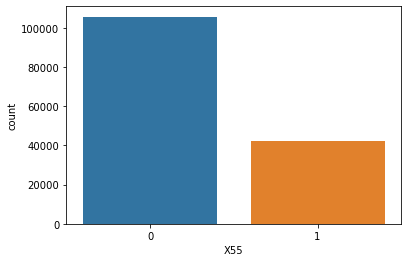

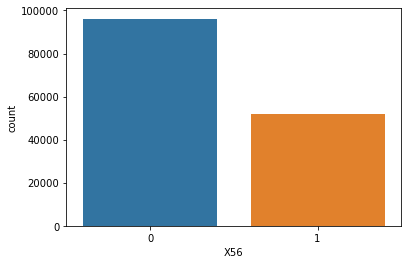

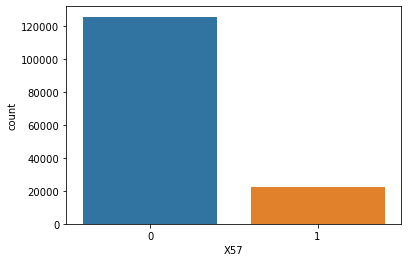

In [21]:
for col in cat_feat:
    sns.countplot(x=col, data=train)
    plt.show()
    

In [22]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
    

    size = len(var_group)
    

    #looping for each variable
    for j,i in enumerate(var_group):
        
        plt.figure(figsize = (7*size,5), dpi = 100)

        # calculating descriptives of variable
        mini = data[i].min()
        maxi = data[i].max()
        ran = data[i].max()-data[i].min()
        mean = data[i].mean()
        median = data[i].median()
        st_dev = data[i].std()
        skew = data[i].skew()
        kurt = data[i].kurtosis()

        # calculating points of standard deviation
        points = mean-st_dev, mean+st_dev

        #Plotting the variable with every information
        plt.subplot(1,size,j+1)
        sns.kdeplot(data[i], shade=True)
        sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
        plt.axvline(mini , color='orange', ls=':', label='Min')
        plt.axvline(maxi, color='yellow', ls=':', label='Max')
        plt.axvline(mean, color='red', ls=':', label='Mean')
        plt.axvline(median, color='green', ls=':', label='Median')
        
        plt.legend()
        plt.xlabel('{}'.format(i), fontsize = 20)
        plt.ylabel('density')
        plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                       round(kurt,2),
                                                                                                       round(skew,2),
                                                                                                       (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                       round(mean,2),
                                                                                                       round(median,2)))
       

### Outliers Detection 

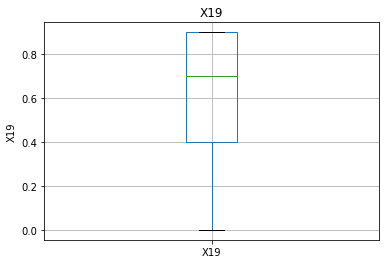

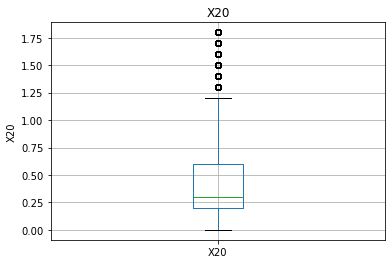

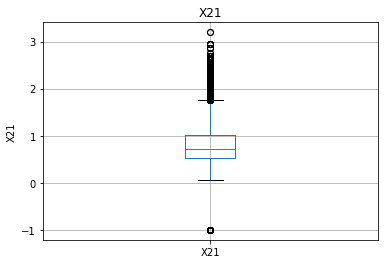

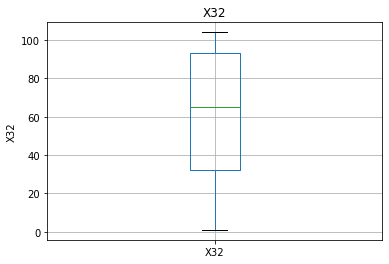

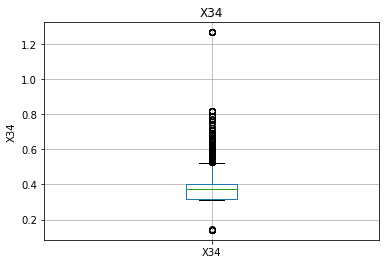

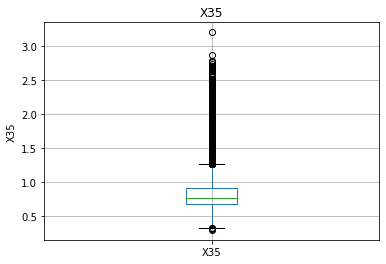

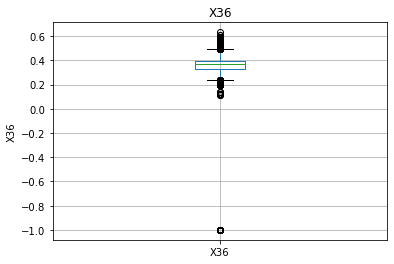

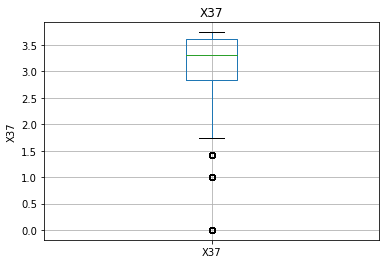

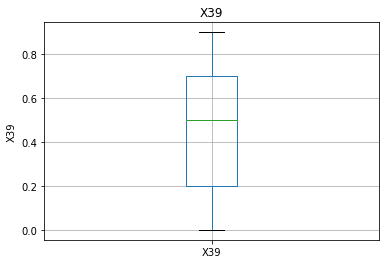

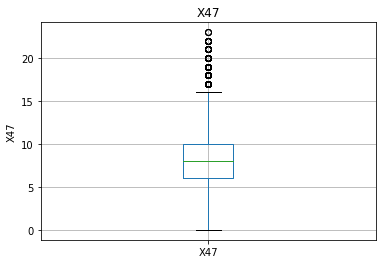

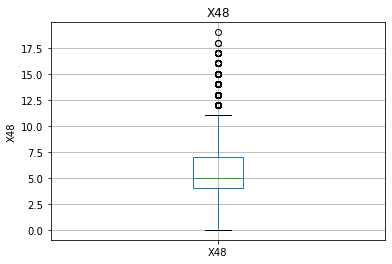

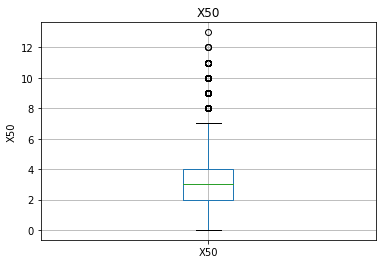

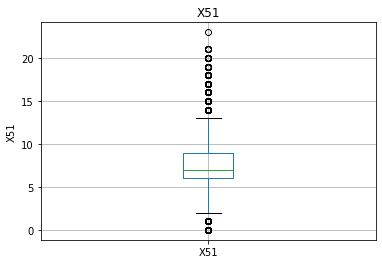

In [23]:
for feature in num_feat: 
    train.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

We can see that otuliers occur in variables X20, X21, X34,X35, X36, X37, X47, X48, X50, X51 

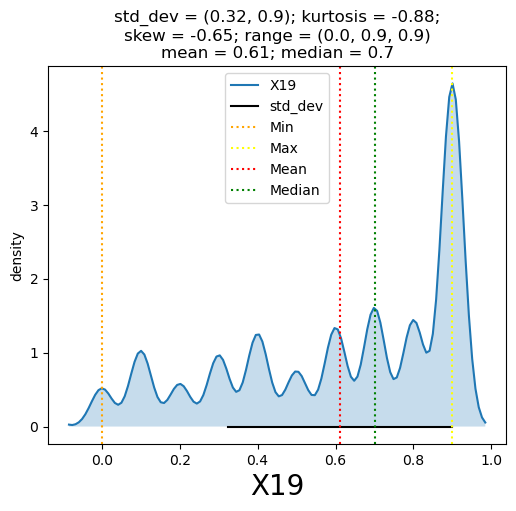

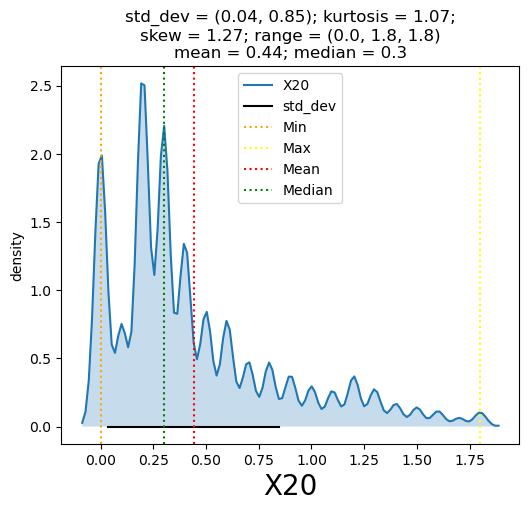

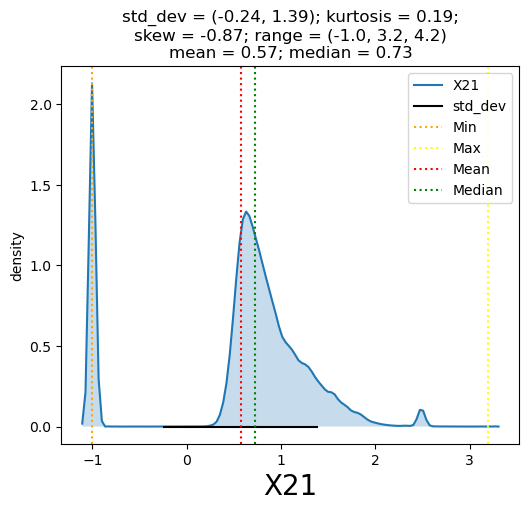

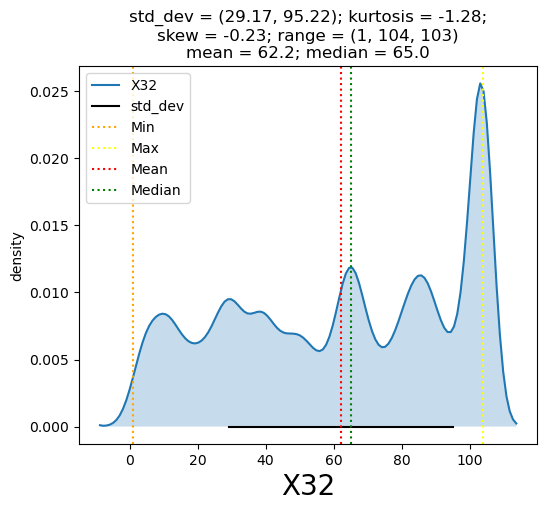

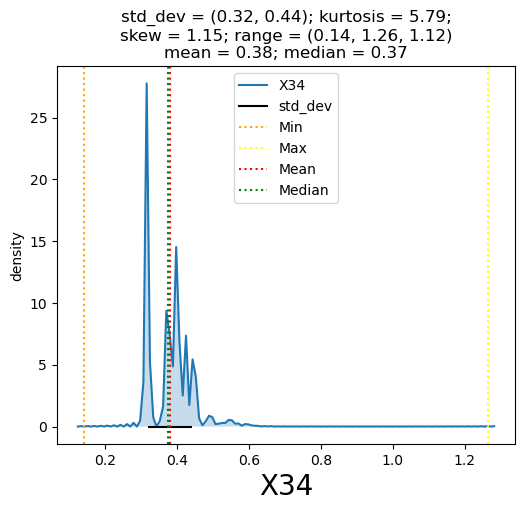

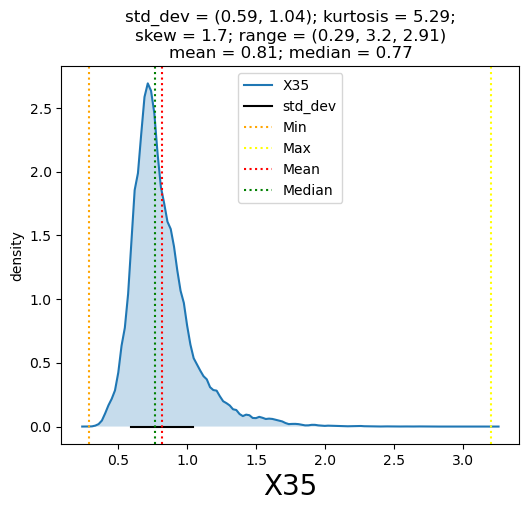

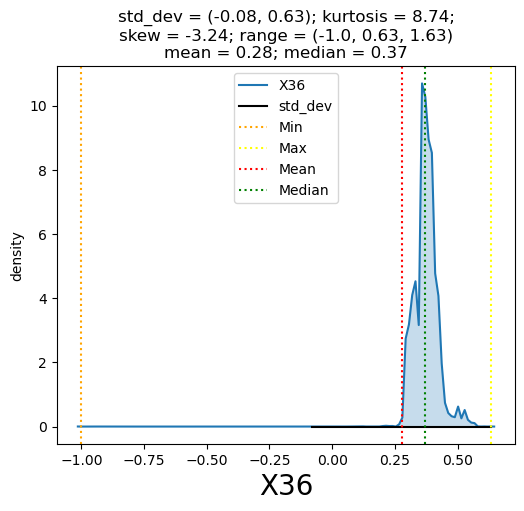

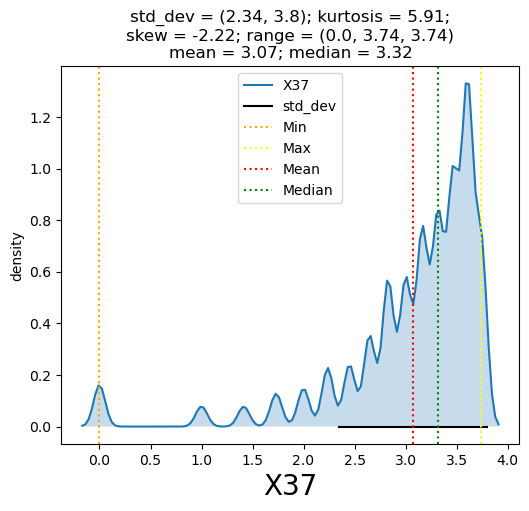

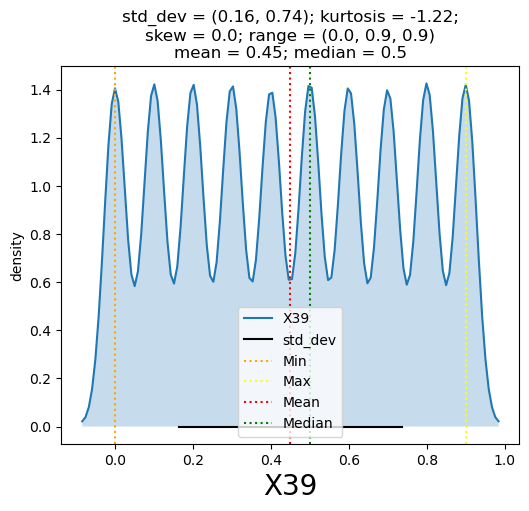

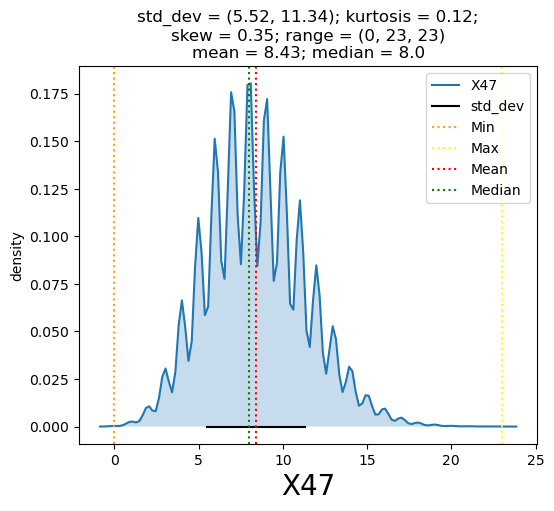

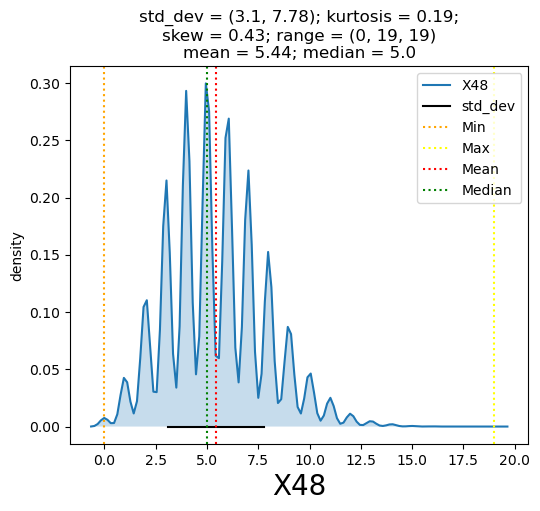

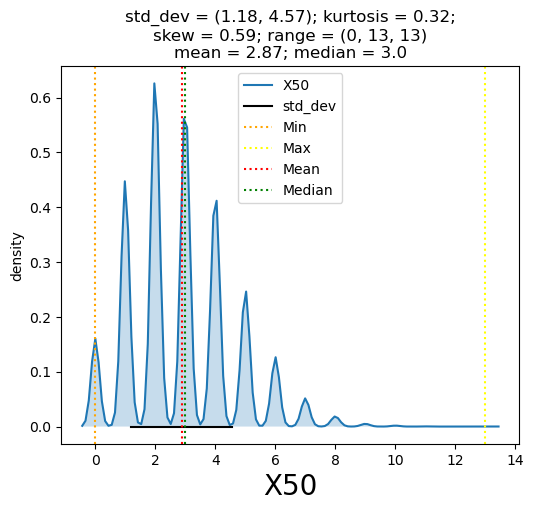

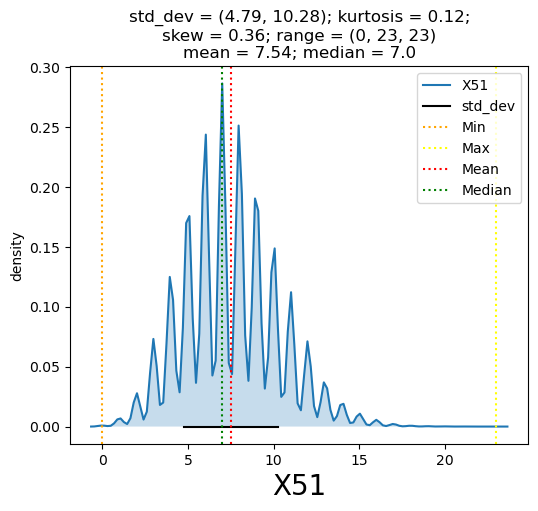

In [24]:
UVA_numeric(train, num_feat)

* If skewness is less than -1 or greater than 1, the distribution is highly skewed.
* If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
* If skewness is between -0.5 and 0.5, the distribution is approximately symmetric

* If kurtosis is higher or less than 3, the distribution is kurtoctic

* X20, X34, X35, X36, X37 are skewed and kurtoctic

### Bivariate Analysis 

### *   Categorical (Target) -> Independent Features (Numerical Features) 

In [25]:
def Boxplot_Bivariate(data, cont, cat):
    sns.boxplot(x=cat, y=cont, data=data,orient='h')
    plt.title('Bivariate boxplot')
    plt.show()
  

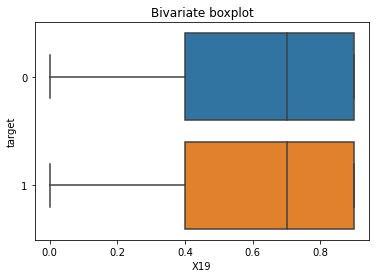

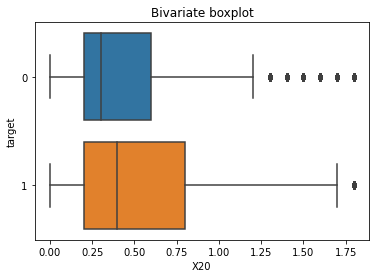

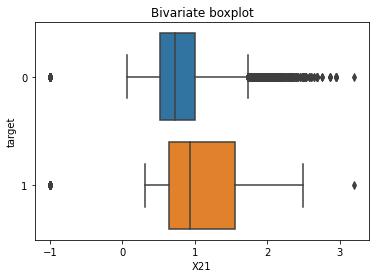

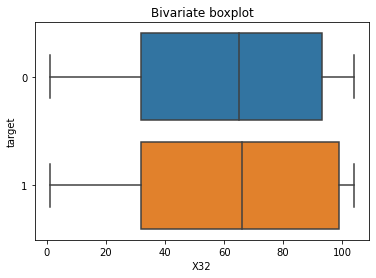

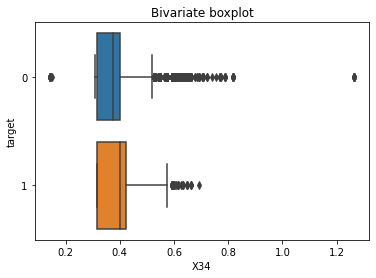

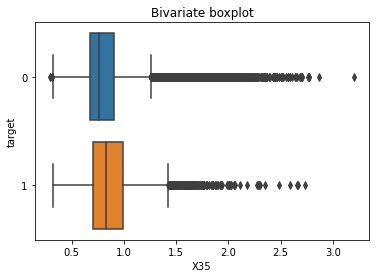

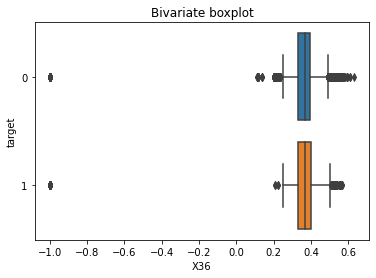

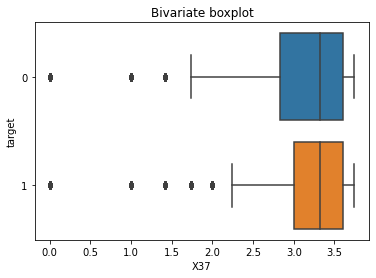

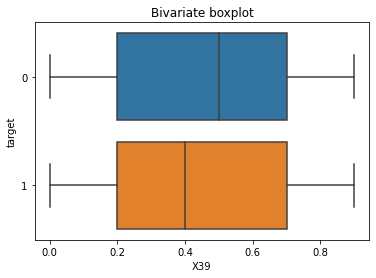

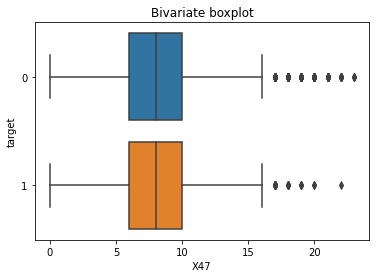

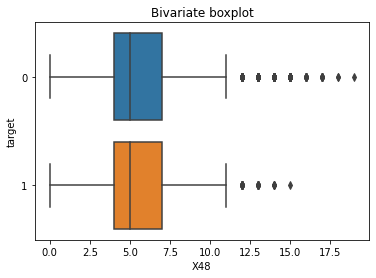

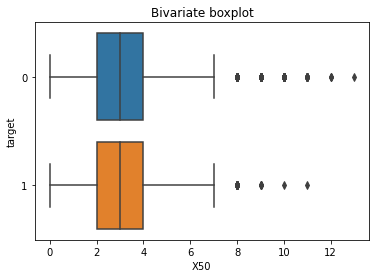

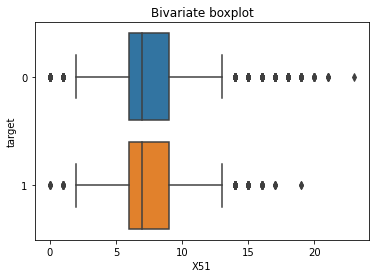

In [26]:
for col1 in num_feat:
    Boxplot_Bivariate(train, train['target'], col1)

### *   Categorical (Target) -> Independent Features (Categorical  Features) 

In [27]:
def BVA_categorical_plot(data, tar, cat):
  '''
  take data and two categorical variables,
  calculates the chi2 significance between the two variables 
  and prints the result with countplot
  '''
  #isolating the variables
  data = data[[cat,tar]][:]
  

  #forming a crosstab
  table = pd.crosstab(data[tar],data[cat],)
  f_obs = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])

  #performing chi2 test
  from scipy.stats import chi2_contingency
  chi, p, dof, expected = chi2_contingency(f_obs)
  
  #checking whether results are significant
  if p<0.05:
    sig = True
  else:
    sig = False
  return p,sig
  #plotting grouped plot
  #sns.countplot(x=cat, hue=tar, data=data)
  #plt.title("p-value = {}\n difference significant? = {}\n".format(round(p,8),sig))
  
  #plotting percent stacked bar plot
  #sns.catplot(ax, kind='stacked')
  #ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack()
  #ax1.plot(kind='bar', stacked='True',title=str(ax1))
  #plt.title("p-value = {}\n difference significant? = {}\n".format(round(p,8),sig))
  #int_level = data[cat].value_counts()
  



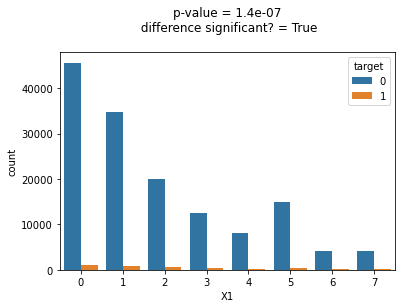

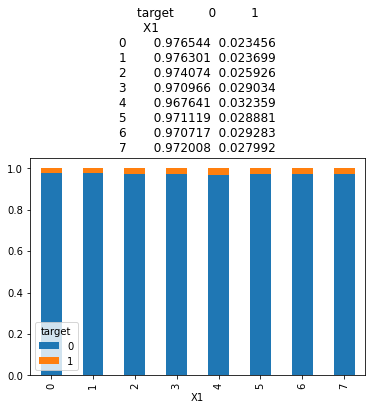

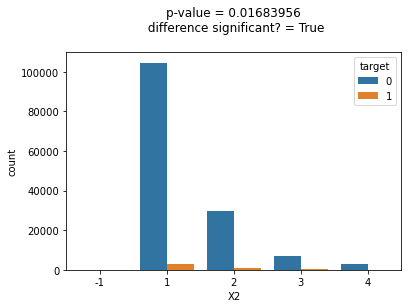

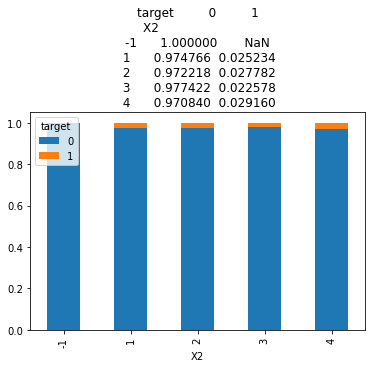

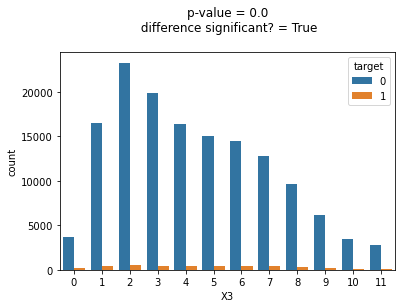

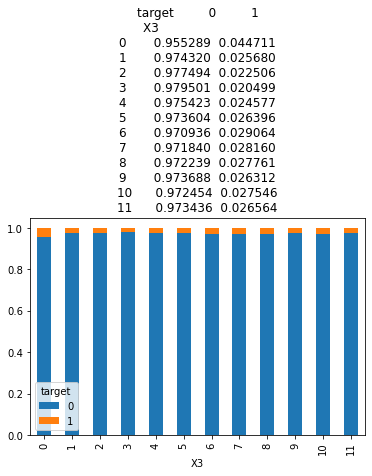

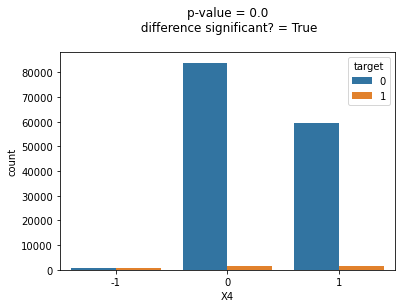

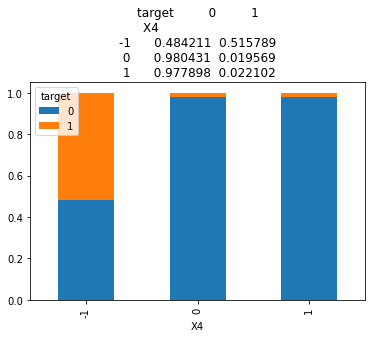

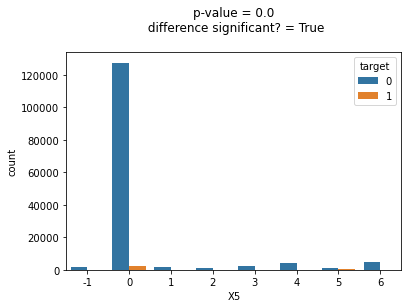

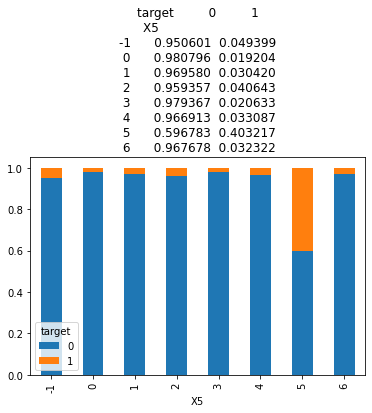

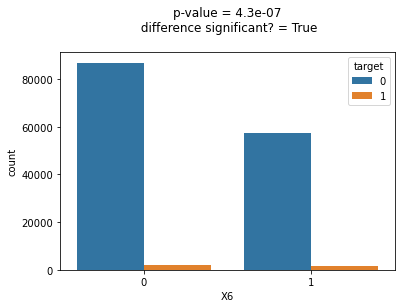

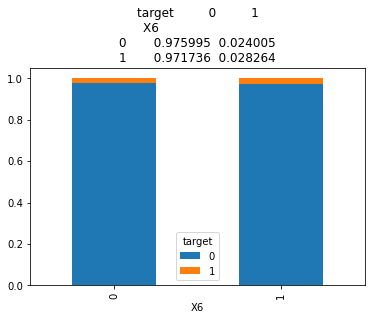

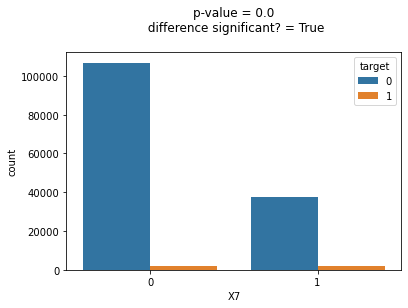

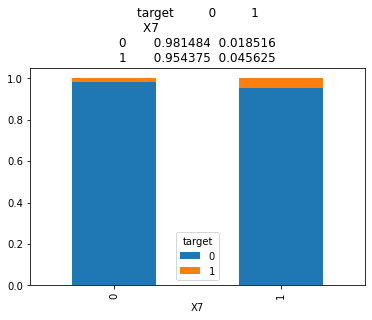

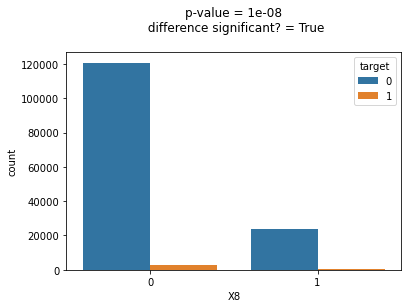

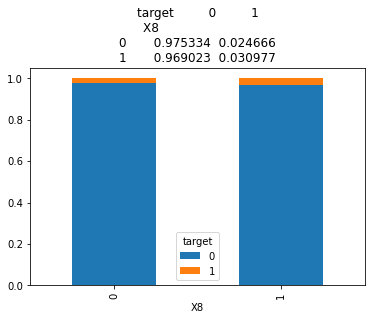

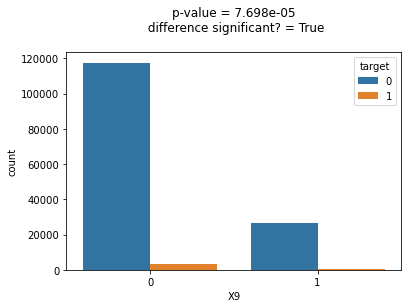

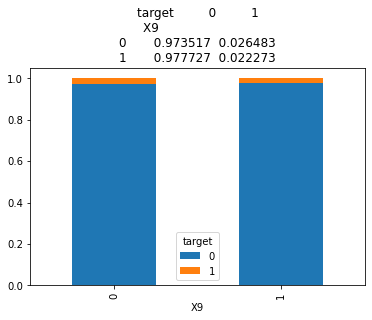

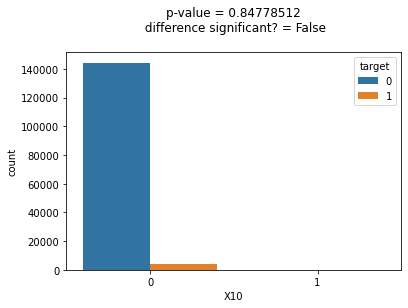

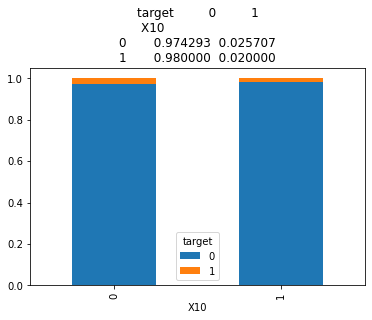

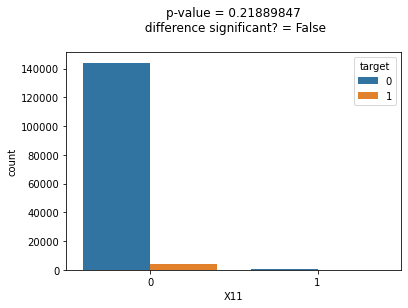

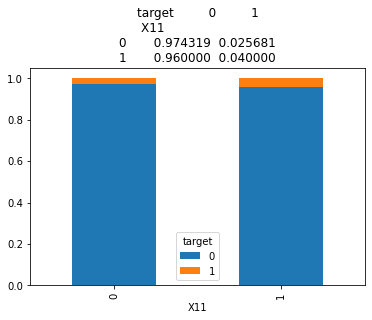

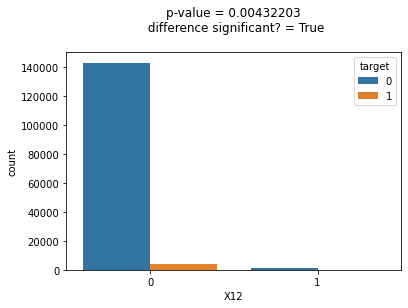

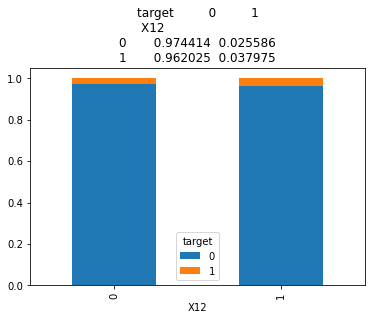

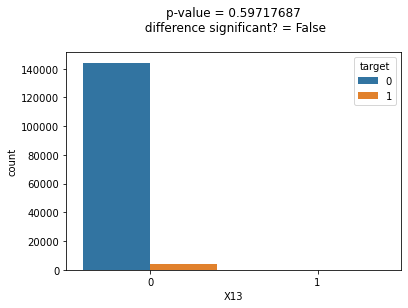

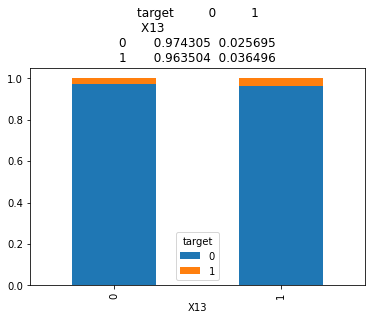

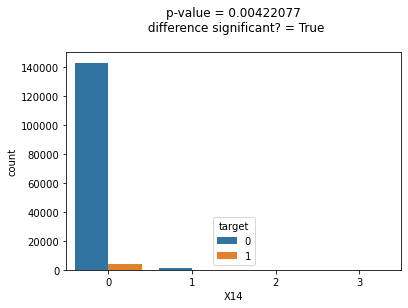

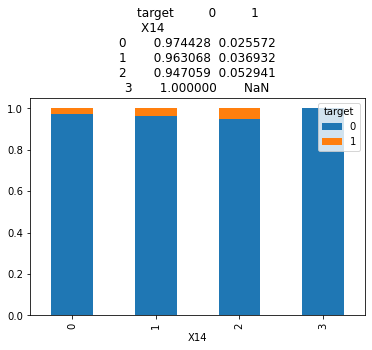

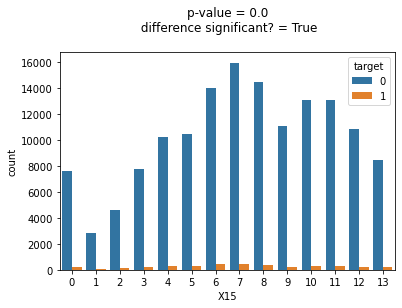

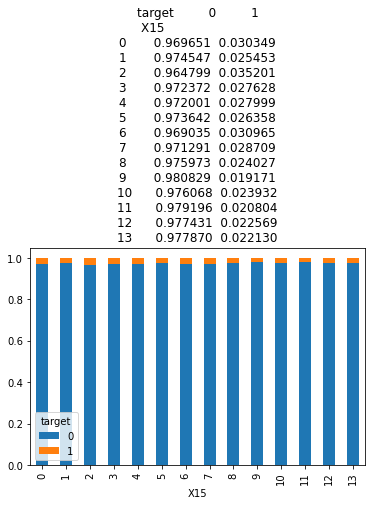

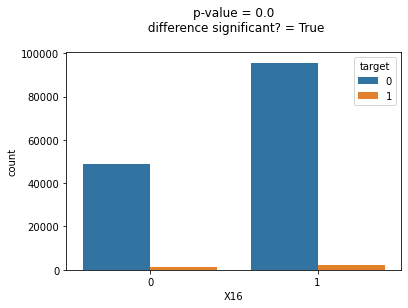

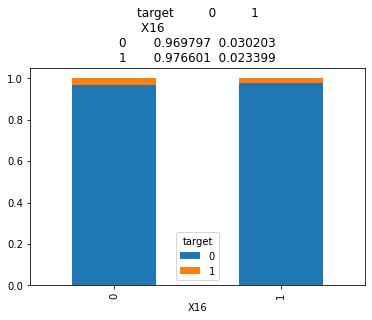

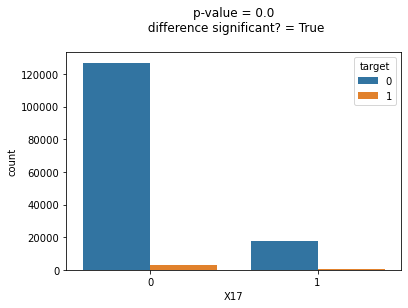

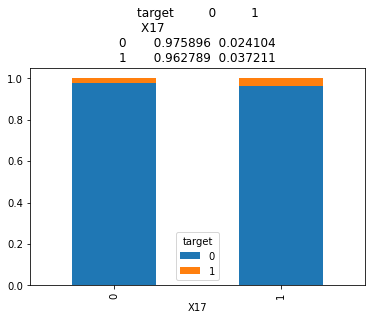

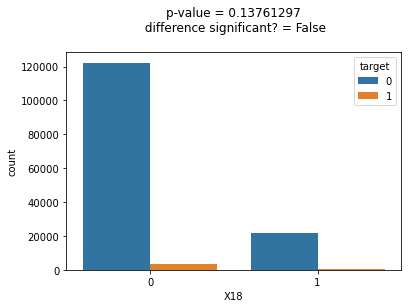

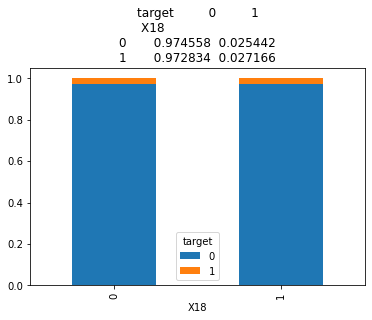

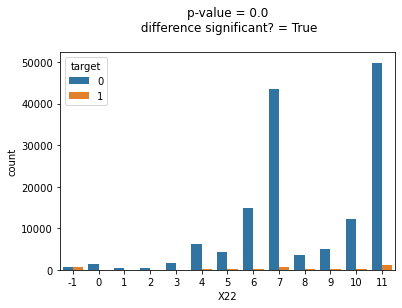

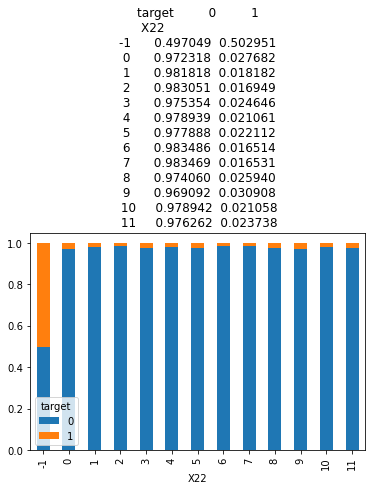

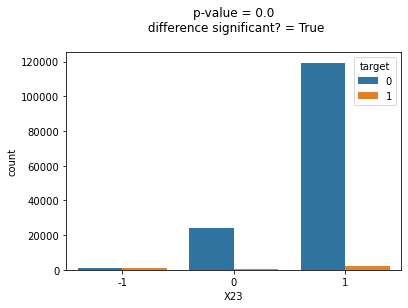

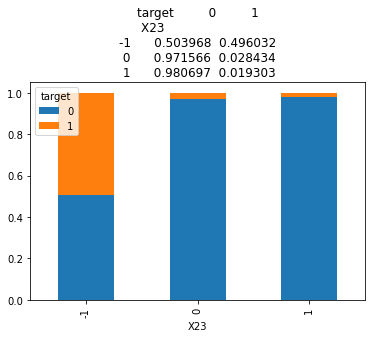

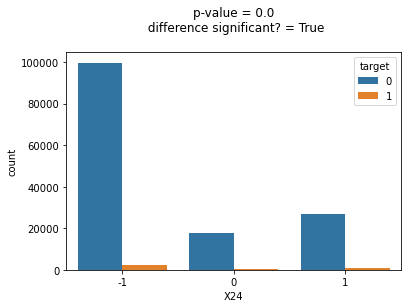

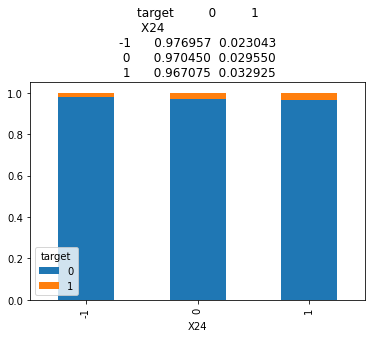

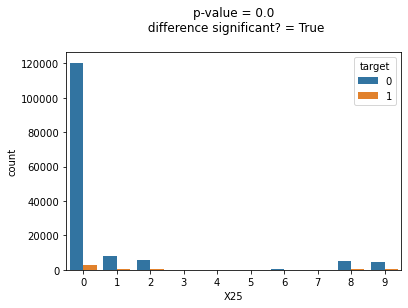

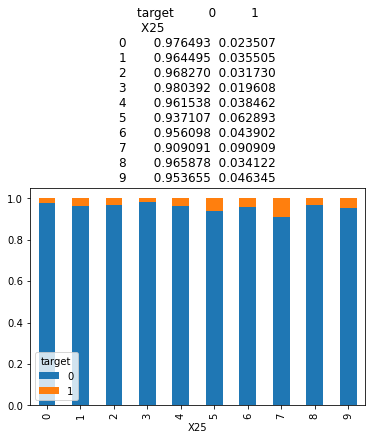

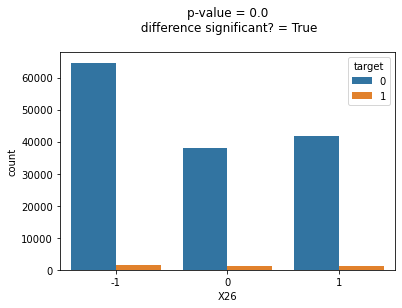

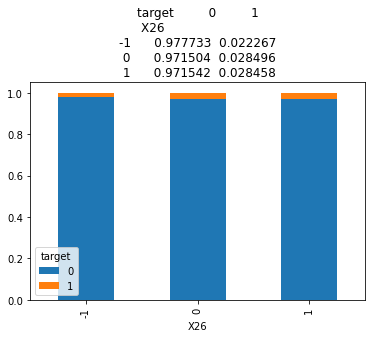

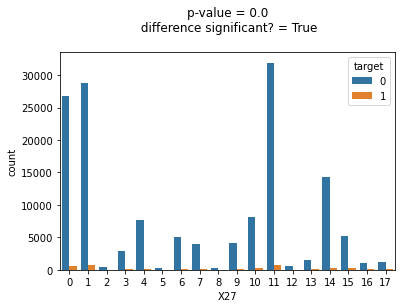

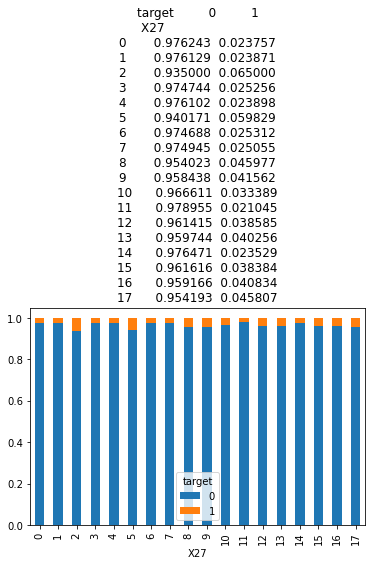

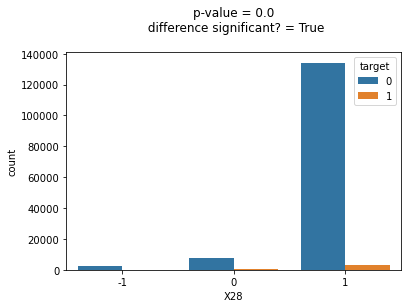

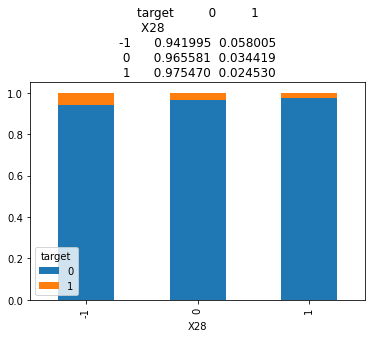

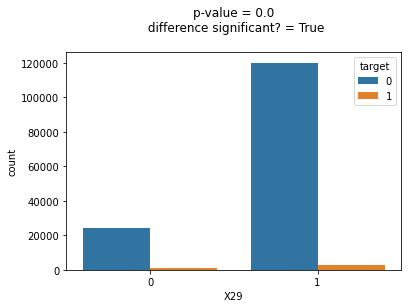

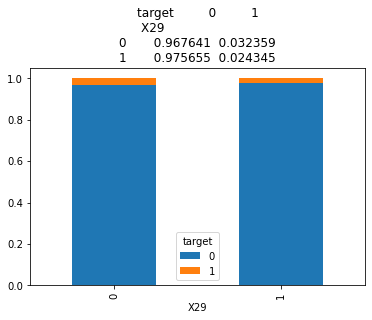

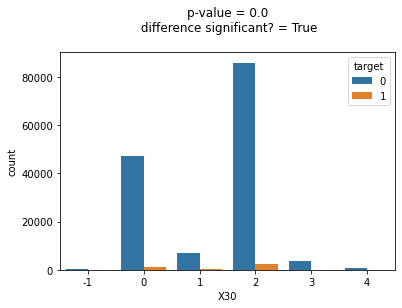

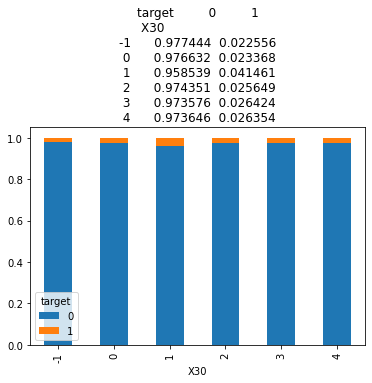

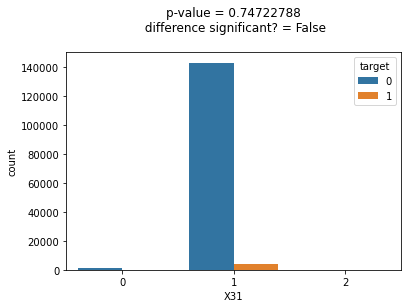

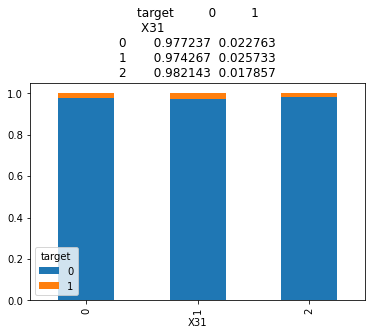

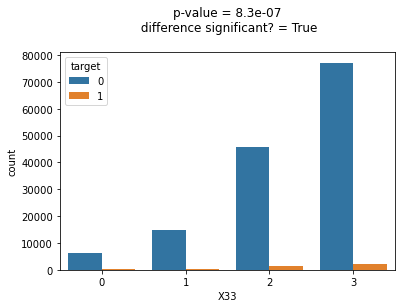

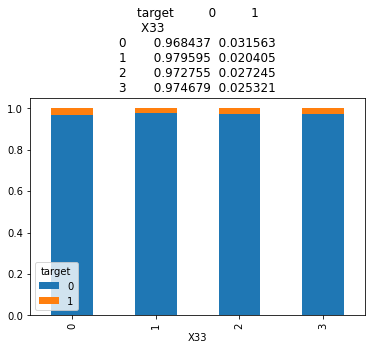

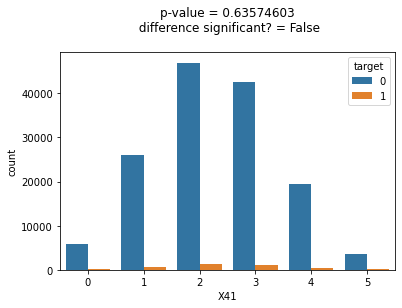

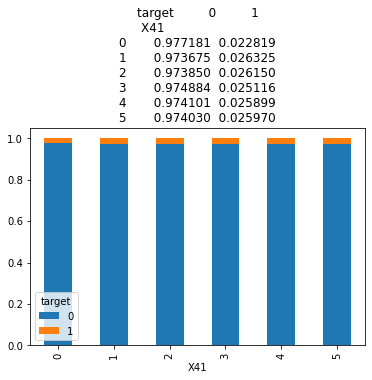

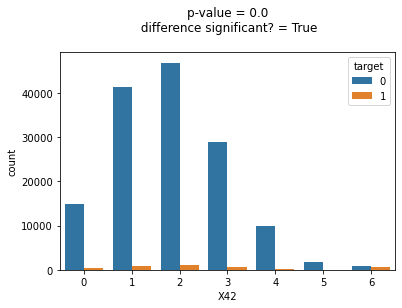

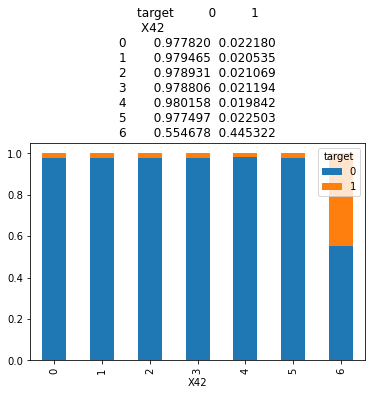

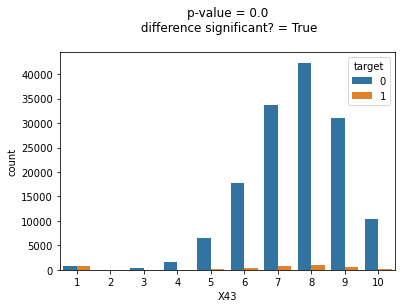

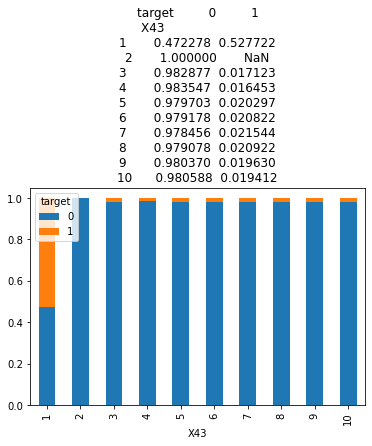

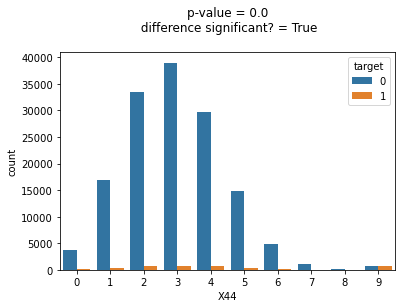

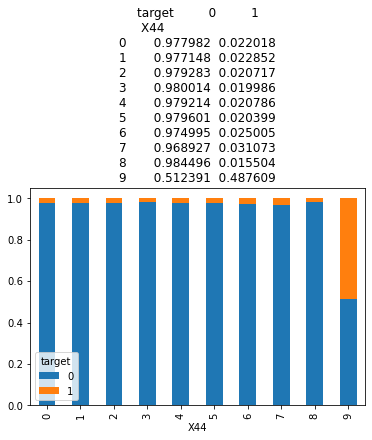

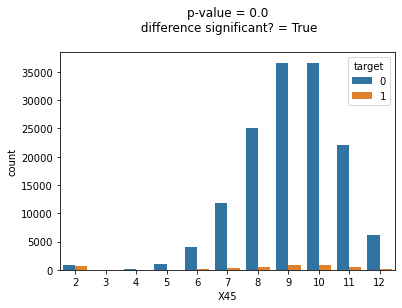

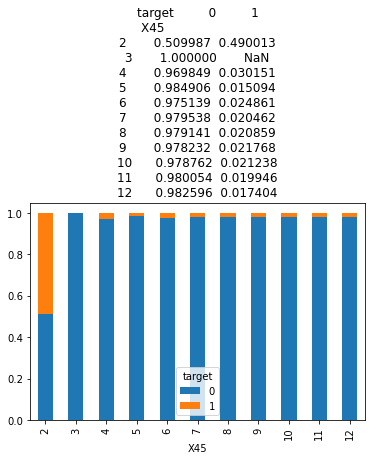

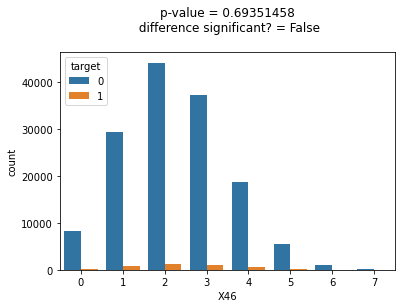

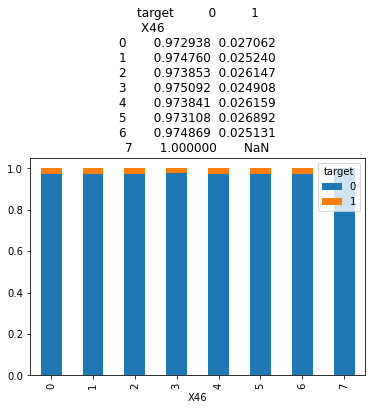

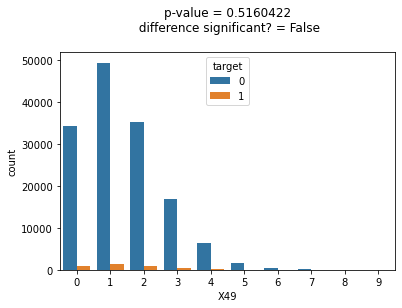

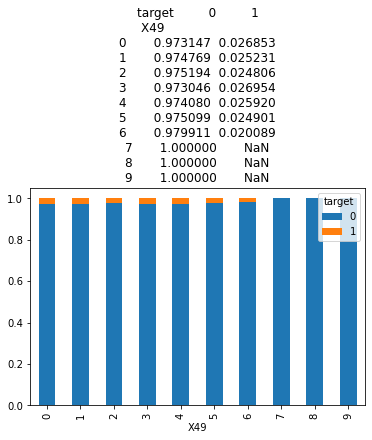

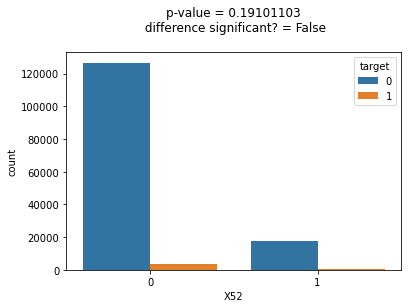

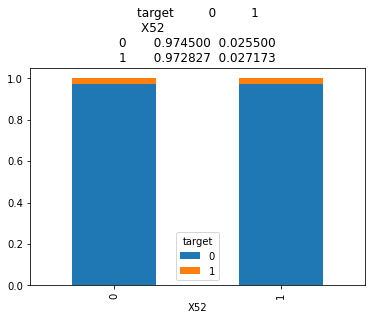

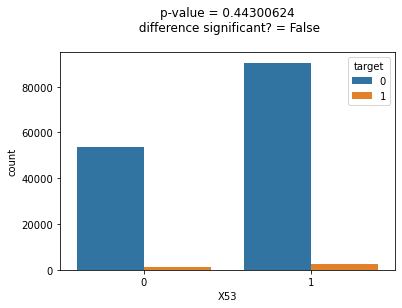

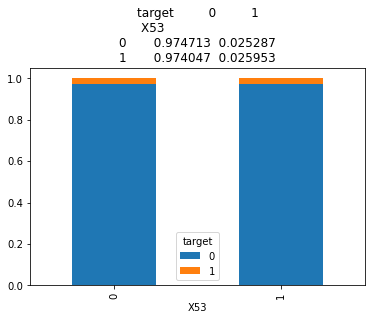

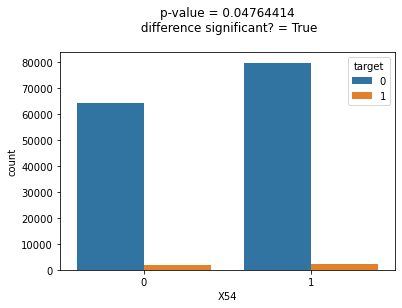

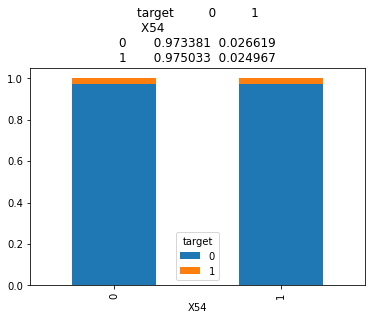

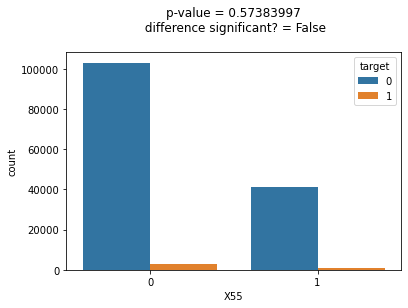

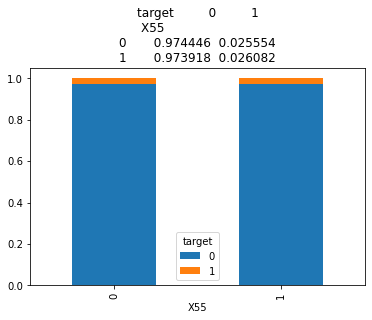

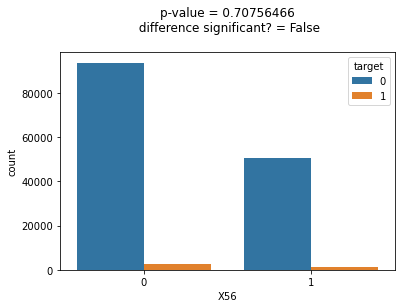

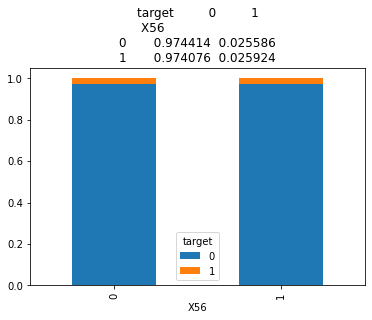

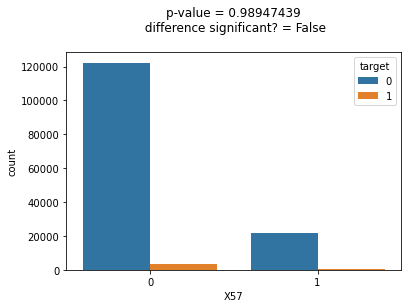

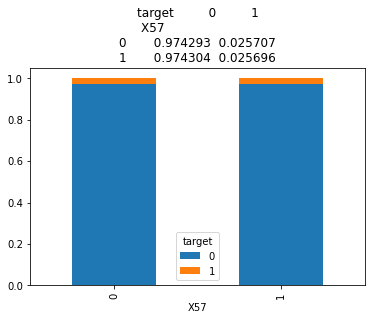

In [28]:
for col1 in cat_feat:
    p, sig=BVA_categorical_plot(train,'target', col1)
    plt.figure()
    sns.countplot(x=col1, hue='target', data=train)
    plt.title("p-value = {}\n difference significant? = {}\n".format(round(p,8),sig))
    #plt.title("p-value = {}\n difference significant? = {}\n".format(round(p,8),sig))
      #plotting percent stacked bar plot
      #sns.catplot(ax, kind='stacked')
    ax1 = train.groupby(col1)['target'].value_counts(normalize=True).unstack()
    ax1.plot(kind='bar', stacked='True',title=str(ax1))    
    int_level = train[col1].value_counts()

In [29]:
train['target']

0         0
1         0
2         0
3         0
4         0
         ..
148099    0
148100    0
148101    1
148102    0
148103    0
Name: target, Length: 148104, dtype: int64

In [30]:
train.head()

,id,target,X1,X2,X3,X4,X5,X6,X7,X8,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,1,0,5,1,3,1,0,0,1,0,...,7,1,2,10,0,0,1,0,1,0
1,2,0,3,1,3,1,0,0,1,0,...,7,2,2,3,0,1,0,1,0,0
2,3,0,4,1,7,0,0,1,0,0,...,11,1,3,10,0,1,1,1,0,0
3,4,0,5,2,5,1,0,0,0,1,...,6,3,2,8,1,1,0,0,1,0
4,5,0,1,1,4,0,0,0,1,0,...,4,1,1,5,0,1,1,0,0,0


In [91]:
#for i in range(len(cat_feat)-1):
#    for j in range(i+1, len(cat_feat)):
#        sns.countplot(x=cat_feat[i],hue=cat_feat[j],data=train)
#        plt.show()

#### By seeing the distributions we can have an idea how skewed are these features, we can also see further distributions of the other features. There are techniques that can help the distributions be less skewed which will be implemented in this notebook in the future.

### Correlation

In [32]:
df_num_corr = train.corr()['target'][:-1] 
golden_features_list = df_num_corr[abs(df_num_corr) > 0.01].sort_values(ascending=False)
print("There is {} strongly correlated values with target:\n{}".format(len(golden_features_list), golden_features_list))

There is 29 strongly correlated values with target:
target    1.000000
X5        0.118515
X44       0.115663
X42       0.099854
X21       0.094588
X7        0.075619
X35       0.052060
X34       0.031465
X20       0.029286
X25       0.028961
X17       0.027117
X37       0.026665
X24       0.025499
X26       0.017474
X19       0.017353
X1        0.014907
X8        0.014786
X6        0.013179
X27       0.010055
X9       -0.010328
X15      -0.018879
X29      -0.019006
X16      -0.020350
X28      -0.031277
X4       -0.080591
X22      -0.097189
X45      -0.136003
X43      -0.145935
X23      -0.152682
Name: target, dtype: float64


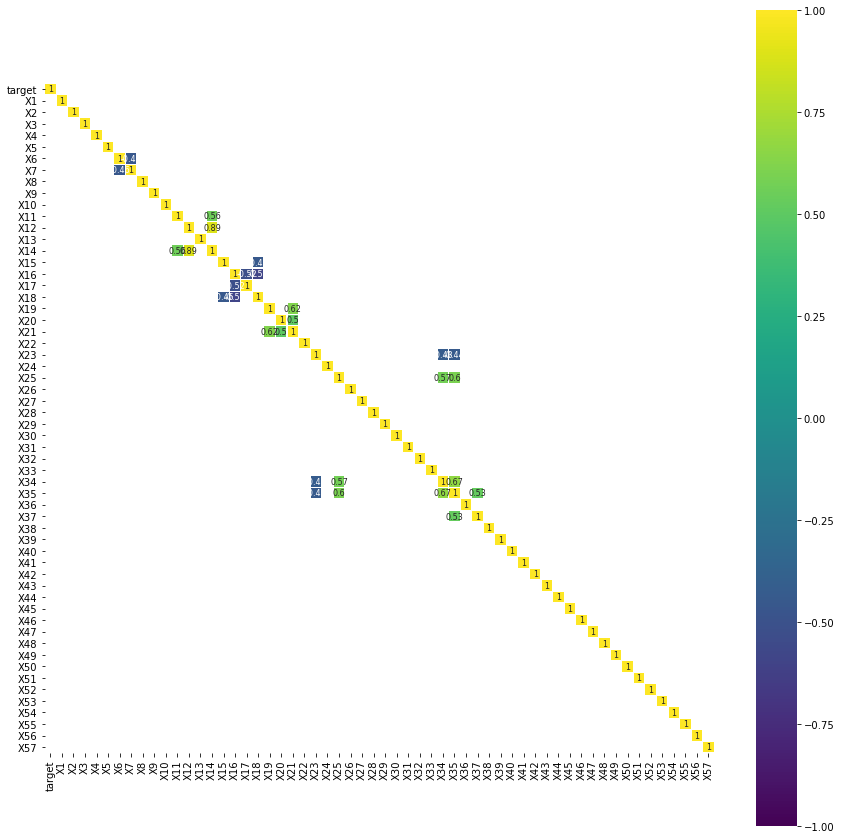

In [33]:
corr = train.drop(['id'], axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(15, 15))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

## 3. Preprocessing 
 * Imputing or Removing missing values
 * Removing Outliers 
 * Transforming skewed data/ Normalization 
 * Standardization 
 * Encoding categorical variables 
 * Removing independent variables which are high correlated with each other (Multicollinear features)
 * Removing variabels having low correlation with the target variables 

In [87]:
import pandas_profiling
from pandas_profiling import ProfileReport

In [86]:
#train.profile_report(style={'full_width':True})
#profile = ProfileReport(train, title='Pandas Profiling Report', html={'style':{'full_width':True}})

ModuleNotFoundError: No module named 'visions.application'

In [46]:
train

,id,target,X1,X2,X3,X4,X5,X6,X7,X8,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,1,0,5,1,3,1,0,0,1,0,...,7,1,2,10,0,0,1,0,1,0
1,2,0,3,1,3,1,0,0,1,0,...,7,2,2,3,0,1,0,1,0,0
2,3,0,4,1,7,0,0,1,0,0,...,11,1,3,10,0,1,1,1,0,0
3,4,0,5,2,5,1,0,0,0,1,...,6,3,2,8,1,1,0,0,1,0
4,5,0,1,1,4,0,0,0,1,0,...,4,1,1,5,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148099,148100,0,0,1,6,0,3,1,0,0,...,3,2,0,4,0,1,1,0,1,0
148100,148101,0,1,2,2,1,0,1,0,0,...,3,3,2,10,0,0,0,0,0,0
148101,148102,1,2,1,7,-1,5,1,0,0,...,6,1,2,8,0,0,1,0,0,0
148102,148103,0,1,4,5,1,0,0,1,0,...,2,1,2,8,1,1,1,0,1,0


Since our data class is imbalanced, you can experiment with tree-based models like the random forest, gradient boosting, or XGboost since they are less sensitive to class imbalance.

### Benchmark Model 

In [48]:
# Importing packages
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, log_loss
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.calibration import CalibratedClassifierCV
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance
from imblearn.over_sampling import SMOTE, ADASYN
from numpy import sort
import lightgbm as lgb
import xgboost as xgb
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [38]:
from sklearn.metrics import precision_recall_curve, roc_curve

In [39]:
train_X = train.drop(['target'], axis=1)
train_Y = train['target']

In [40]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score

In [41]:
train_x, valid_x, train_y, valid_y= train_test_split (train_X, train_Y, test_size=0.3, stratify=train_Y, random_state=100)

In [70]:
model=DecisionTreeClassifier(max_depth=10, random_state=0)
#model=RandomForestClassifier(max_depth=20, random_state=0)


In [71]:
model.fit(train_x, train_y)
pred=model.predict(valid_x)
f_score=f1_score(valid_y, pred)

print('f score :', f_score)

f score : 0.5929148539465506


### 1. Set optimal threshold using precision_recall_curve in oder to maximize the threshold

Optimal Threshold : 0.038461538461538464 ; Best f score : 0.5846536191363778


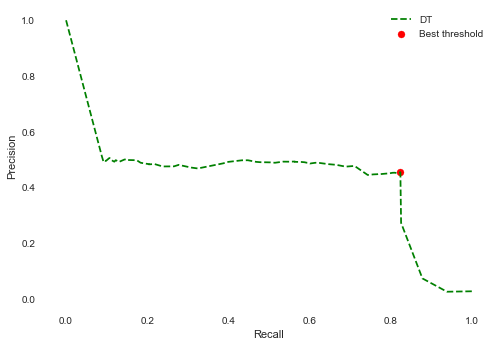

In [45]:
model.fit(train_x, train_y)
pred_proba=model.predict_proba(valid_x)
probs=pred_proba[:,1]
precision, recall, thresholds = precision_recall_curve(valid_y, probs)
f_score=2*(precision*recall)/(precision+recall)
ix=np.argmax(f_score)
print('Optimal Threshold :', thresholds[ix],'; Best f score :', f_score[ix])
plt.plot(recall, precision, linestyle='--', label='DT', color='green')
plt.scatter(recall[ix], precision[ix], marker='o', label='Optimal threshold' , color='red')
plt.legend(loc='best')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

### 2. Class weights Optimization  

In [67]:
weights = np.logspace(1,4,4).astype(int)
weight_list_dict = [{0:int(1), 1: weights[i]} for i in range(len(weights))]

grid_model = GridSearchCV(model , n_jobs = 5, param_grid = {'class_weight': weight_list_dict}, scoring = 'f1')
grid_model.fit(train_x, train_y)
best_forest = grid_model.best_estimator_
print('Optimized Model Parameters:',best_forest , '  Optimal f1 score :',  grid_model.best_score_ )

Optimized Model Parameters: DecisionTreeClassifier(class_weight={0: 1, 1: 10}, max_depth=10, random_state=0)   Optimal f1 score : 0.5843698638519121


#### Training Decision Tree With Best Hyperparameters

In [83]:

model=DecisionTreeClassifier(class_weight={0: 1, 1: 10}, max_depth=10, random_state=0)
model.fit(train_x, train_y)
pred=model.predict(valid_x)
f_score=f1_score(valid_y, pred)
print('f1 score after class weights tuning  :', f_score)

f score after class weights tuning  : 0.5929148539465506


In [90]:
model=DecisionTreeClassifier(max_depth=10, random_state=0)
model.fit(train_x, train_y)
pred_proba=model.predict_proba(valid_x)
probs=pred_proba[:,1]
pred=(probs> thresholds[ix]).astype('int')
f_score=f1_score(valid_y, pred)
print('f1 score after selecting the optimal threshold:', f_score)

f1 score after selecting the optimal threshold: 0.5799812909260992


### Techniques of Re-sampling
* Under Sampling
* Over Sampling
* SMOTET and its variants

* Never test on the oversampled or undersampled dataset.
* If we want to implement cross validation, remember to oversample or undersample your training data during cross-validation, not before!
* Don't use accuracy score as a metric with imbalanced datasets (will be usually high and misleading), instead use f1-score, precision/recall score or confusion matrix

Source: 
https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets

### 4. Smote 

In [93]:
from imblearn.over_sampling import SMOTE

In [94]:
print("Before OverSampling, counts of label '1': {}".format(sum(train_y==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(train_y==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(train_x, train_y.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 2665
Before OverSampling, counts of label '0': 101007 

After OverSampling, the shape of train_X: (202014, 58)
After OverSampling, the shape of train_y: (202014,) 

After OverSampling, counts of label '1': 101007
After OverSampling, counts of label '0': 101007


In [114]:
# A function to run train and test for each model
def run_model(name, model, X_train, Y_train, X_valid, Y_valid, verbose=True):   
    
    if verbose: print(f"{name}")
    model.fit(X_train, Y_train)
        
                        
        # Get the class probabilities of the input samples        
    train_pred = model.predict(X_valid)
    train_pred_prob = model.predict_proba(X_valid)[:,1]
       
    acc = accuracy_score(Y_valid, train_pred)
    roc = roc_auc_score(Y_valid, train_pred_prob)
    f1 =f1_score(Y_valid, pred)
                
        
    
    # Compute the mean
    if verbose:
        print("Accuracy : %.4g" % (acc))
        print("AUC Score: %f" % (roc))
        print("F1 score: %f" % (f1))
    

    # Return the last version 
    return (model, acc, roc, f1)

In [115]:
models = {}

models['LogisticRegression'] = LogisticRegression()

models['LinearDiscriminantAnalysis'] = LinearDiscriminantAnalysis()
#models['LGBMClassifier'] = lgb.LGBMClassifier(objective='binary', 
#                                              is_unbalance=True, 
#                                              max_depth=30,  
#                                             verbose = 0)
models['Decision Tree' ]=DecisionTreeClassifier(max_depth=10, random_state=0)
models['XGBClassifier'] = XGBClassifier( max_depth = 10, n_jobs = -1,seed = 32)

In [116]:
results = pd.DataFrame(columns=['Model', 'Accuracy ', 'F1 score'])

train_x = train.drop(['target'], axis=1)
train_y = train['target']
    
for m in models.keys():
    # Train and test the model
    models[m], acc, roc, f1 = run_model(m, models[m], X_train_res, y_train_res,valid_x, valid_y)  
        
    # Save Results
    results = results.append({'Model' : m, 'Accuracy': acc,  'F1 score': f1} , ignore_index=True)

LogisticRegression
Accuracy : 0.842
AUC Score: 0.843408
F1 score: 0.579981
LinearDiscriminantAnalysis
Accuracy : 0.9525
AUC Score: 0.764579
F1 score: 0.579981
Decision Tree
Accuracy : 0.9167
AUC Score: 0.760639
F1 score: 0.579981
XGBClassifier
[14:18:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy : 0.9742
AUC Score: 0.941879
F1 score: 0.579981
